# EDA

<img src="https://fiverr-res.cloudinary.com/images/q_auto,f_auto/gigs/119515873/original/69d50b8a2c493e69dc3900f22665afe2903fd348/do-exploratory-data-analysis-and-feature-engineering-for-you.png">

; **(Exploratory data analysis)**
  - [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis) 


###### Table of contents

   1. <a href="#stat">기술통계량 </a>
   2. <a href="#vis">시각화 </a>
   3. <a href="#report">Data report</a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
font = {'family': 'applegothic',
        'weight': 'bold',
        'size': 31}
mpl.rc('font', **font)
mpl.rc('axes', unicode_minus=False)

In [26]:
df = pd.read_csv("KR_youtube.csv")
df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
30280,qmByxOvlrJA,18.30.05,"자유한국당 건물주 계약연장 난색,홍준표 이사가자!",뉴스벅,25,2018-05-29T11:00:14.000Z,"자유한국당|""홍준표""|""자유한국당 영등포""|""자유한국당 건물주""",127422,855,59,401,https://i.ytimg.com/vi/qmByxOvlrJA/default.jpg,True,True,True,한국당이 11년 만에 여의도를 떠난다고 보도했다. 이에 따르면 여의도를 떠나는 가장...,News & Politics
99,XdVhT60Loxg,17.14.11,유설(YUSEOL) - 'Ocean View' M/V Teaser,NEWPLAN ENTERTAINMENT,10,2017-11-11T09:00:02.000Z,[none],162551,7356,4,217,https://i.ytimg.com/vi/XdVhT60Loxg/default.jpg,True,True,True,유설(YUSEOL) - 'Ocean View' M/V Teaser\n\n#유설 #Y...,Music
9556,1t1YNx9x6MM,18.15.01,런던일상| 토트넘 VS 에버튼 손흥민 팀내 최고평점!!대활약!!경기 영국인 친구들과...,유경데이 Yookyung's Day,22,2018-01-14T02:36:10.000Z,"손흥민경기|""손흥민선발""|""토트넘""|""토트넘 에버튼""|""웸블리""|""손흥민축구""|""프...",224677,1343,139,269,https://i.ytimg.com/vi/1t1YNx9x6MM/default.jpg,True,True,True,"여러분! 앤디, 빌 형제와 보러간 토트넘 경기의 현장 분위기를 여러분께 전달드리고자...",People & Blogs


### 기술 통계량
<p id="stat">
    
    - 데이터를 우리는 어떻게 바라 볼 것인가. 
    - 분포와 기술통계
        - 기술통계량을 보면 분포를 상상할 수 있다.(근데 우리는 21세기에 살고 있다. 그냥 그래프로...)
        - 평균(표본), 중앙, 최빈, 분산
    - 기술 통계량에서 

#### 데이터를 우리는 어떻게 바라 볼 것인가. 


  **확률적 데이터**
  
   : 항상 같은 값이 나오는 데이터를 결정론적 데이터(deterministic data), 예측할 수 없는 값이 나오는 데이터를 확률적 데이터(random data, probabilistic data, stochastic data)라고 한다. 우리가 다루는 대부분의 데이터는 확률적 데이터이다.

**데이터가 확률적이 되는 이유는 ?**

  1. 넓은 범위의 대상 
  2. 측정 시 오차 
  
**우리가 할 수 있는 것**

  : 상황에 따라 우리가 가지고 있는 지식이 있다. 이 지식을 정량적으로 표현 하는 것은 데이터분석으로 해야 하는 중요한 일 중 하나이다.

In [20]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,33023.000000,3.302300e+04,3.302300e+04,3.302300e+04,3.302300e+04
mean,21.151985,4.206037e+05,1.181485e+04,5.332303e+02,1.991526e+03
std,6.669264,2.427884e+06,1.155629e+05,1.398592e+04,2.167840e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.774100e+04,4.110000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.111940e+05,1.386000e+03,6.500000e+01,3.440000e+02
75%,25.000000,2.786070e+05,3.691000e+03,1.740000e+02,9.250000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


#### 기술 통계량의 의미 

* Flow
    1. 데이터의 갯수
    1. 대푯값 
    2. Quantile
    2. 분산 
    
    
기술 통계량으로 우리는 분포를 유추 할 수 있다.

**분포??**

 : 확률적 데이터에서 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 특성

In [21]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,33023.000000,3.302300e+04,3.302300e+04,3.302300e+04,3.302300e+04
mean,21.151985,4.206037e+05,1.181485e+04,5.332303e+02,1.991526e+03
std,6.669264,2.427884e+06,1.155629e+05,1.398592e+04,2.167840e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.774100e+04,4.110000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.111940e+05,1.386000e+03,6.500000e+01,3.440000e+02
75%,25.000000,2.786070e+05,3.691000e+03,1.740000e+02,9.250000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


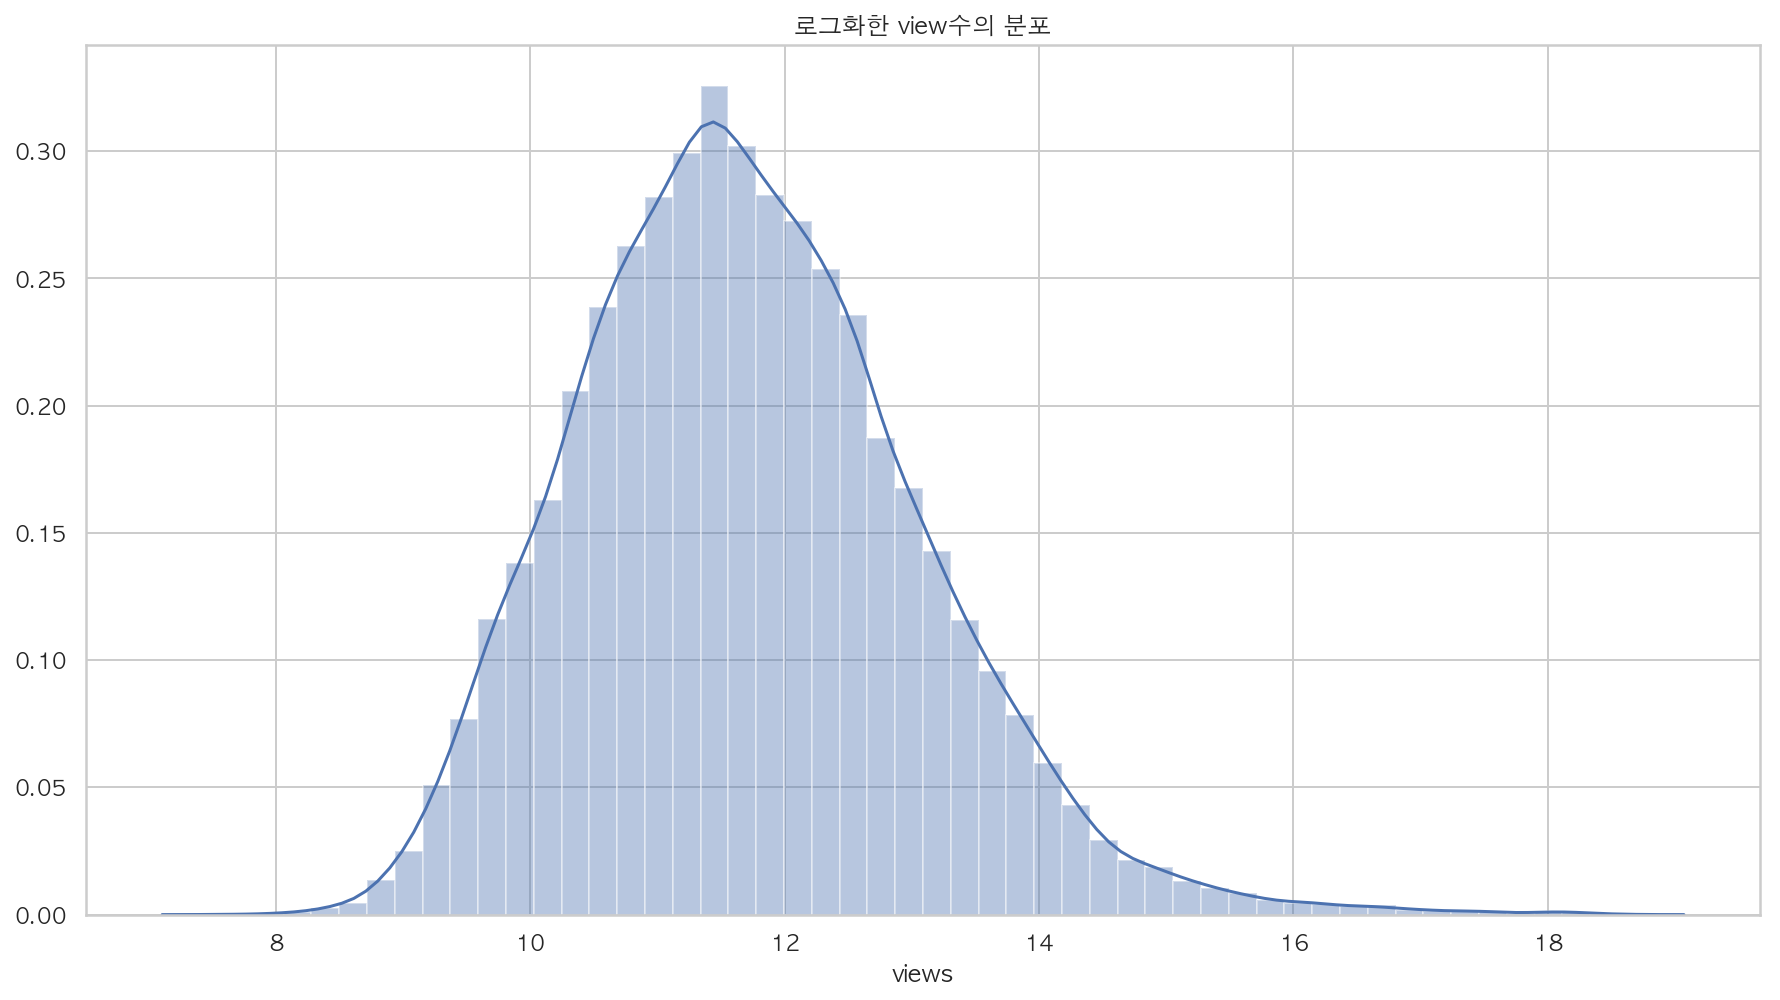

In [57]:
plt.figure(figsize=(15, 8))
sns.distplot(df.views.apply(np.log))
plt.title("로그화한 view수의 분포")
plt.show()

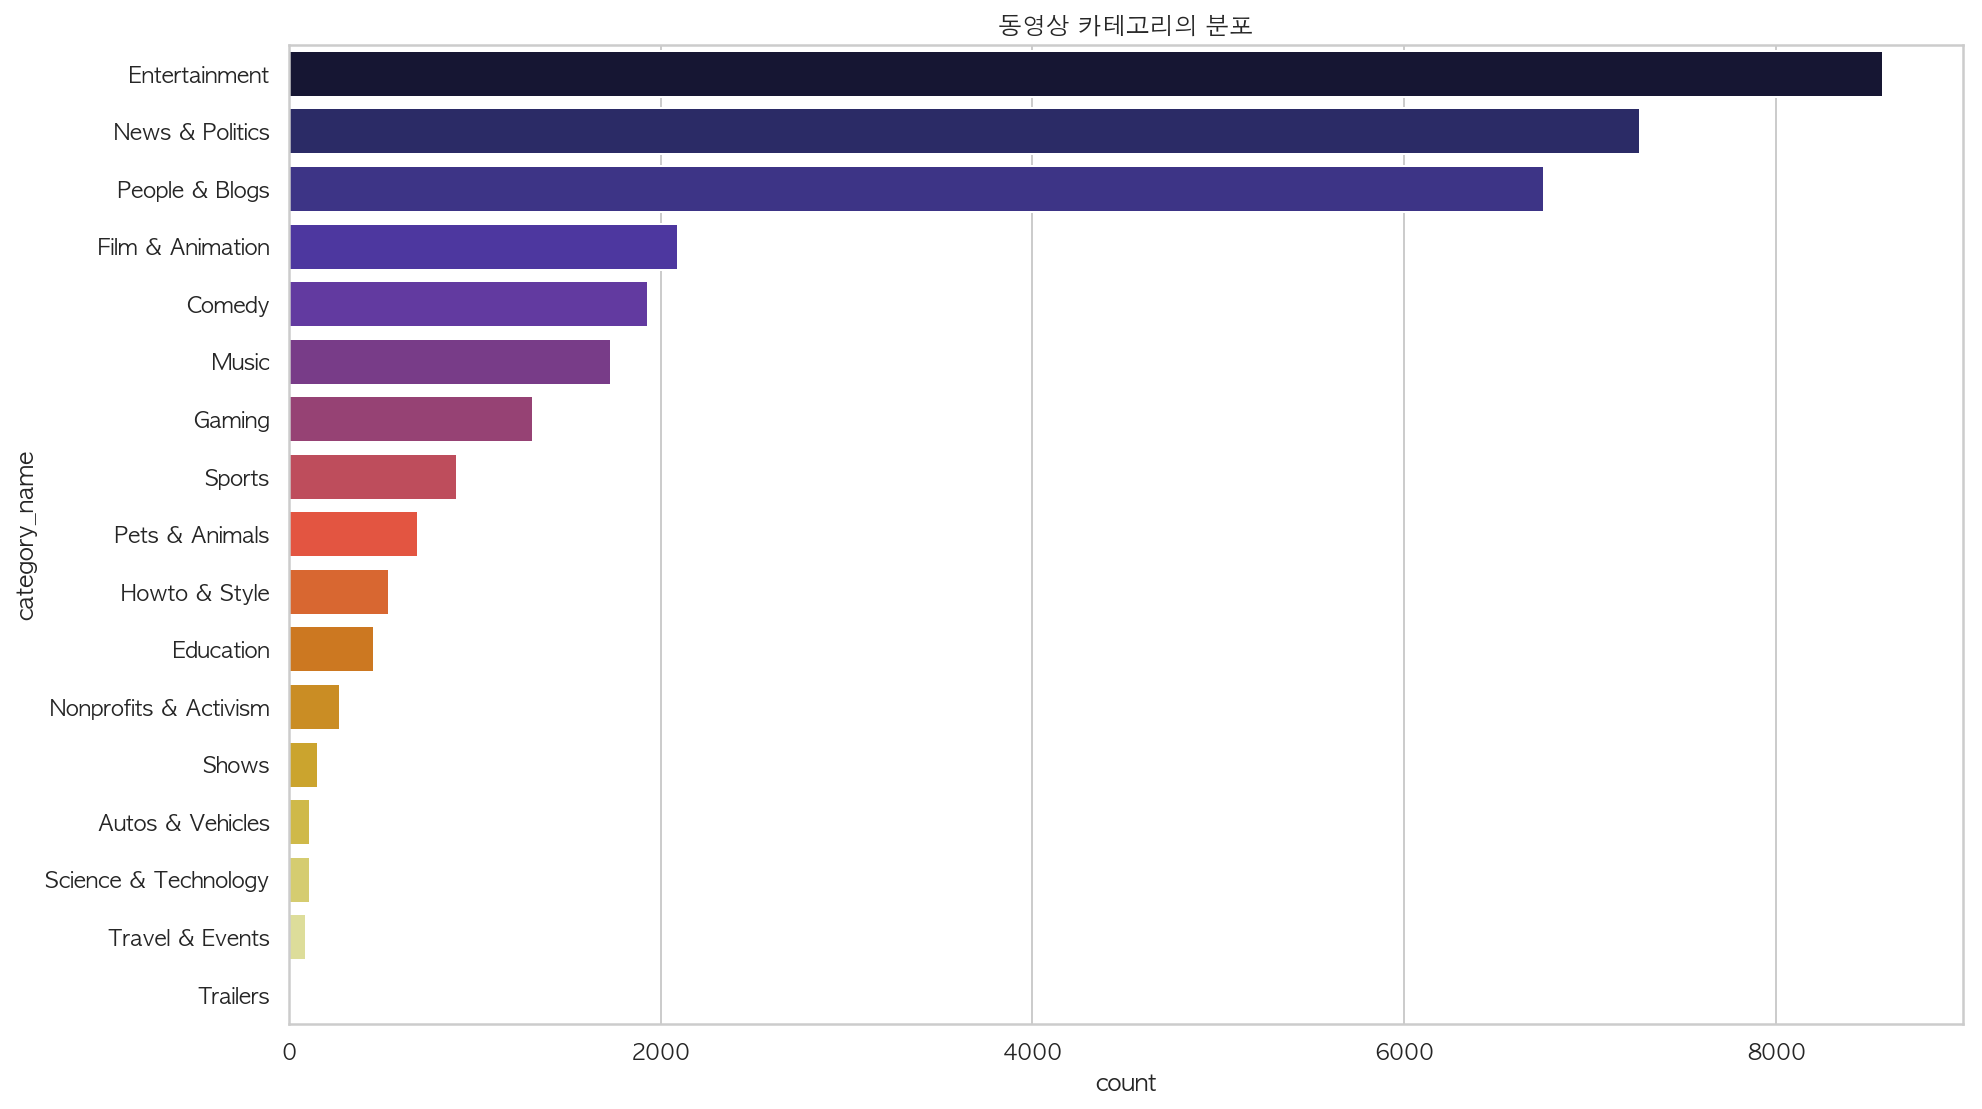

In [104]:
plt.figure(figsize=(15, 9))
sns.countplot(y=df.category_name, palette="CMRmap", order=df.category_name.value_counts().index)
plt.title("동영상 카테고리의 분포")
plt.show()

`다음처럼 분포를 그려볼 수 없을 때, 
이 분포의 특성을 나타내는 몇가지 숫자로 데이터의 분포에 대한 정보를 줄 수 있는데, 이 숫자들이 기술통계량이다. `

**(근데 우리는 21세기에 살고 있다. 그냥 그래프로...)**

#### 평균, 중앙값, 최빈값

> **평균을 믿으시나요?**
 
 <img src="https://misc.ridibooks.com/cover/222001933/xxlarge">

#### 최빈값, 중앙값, 평균의 관계

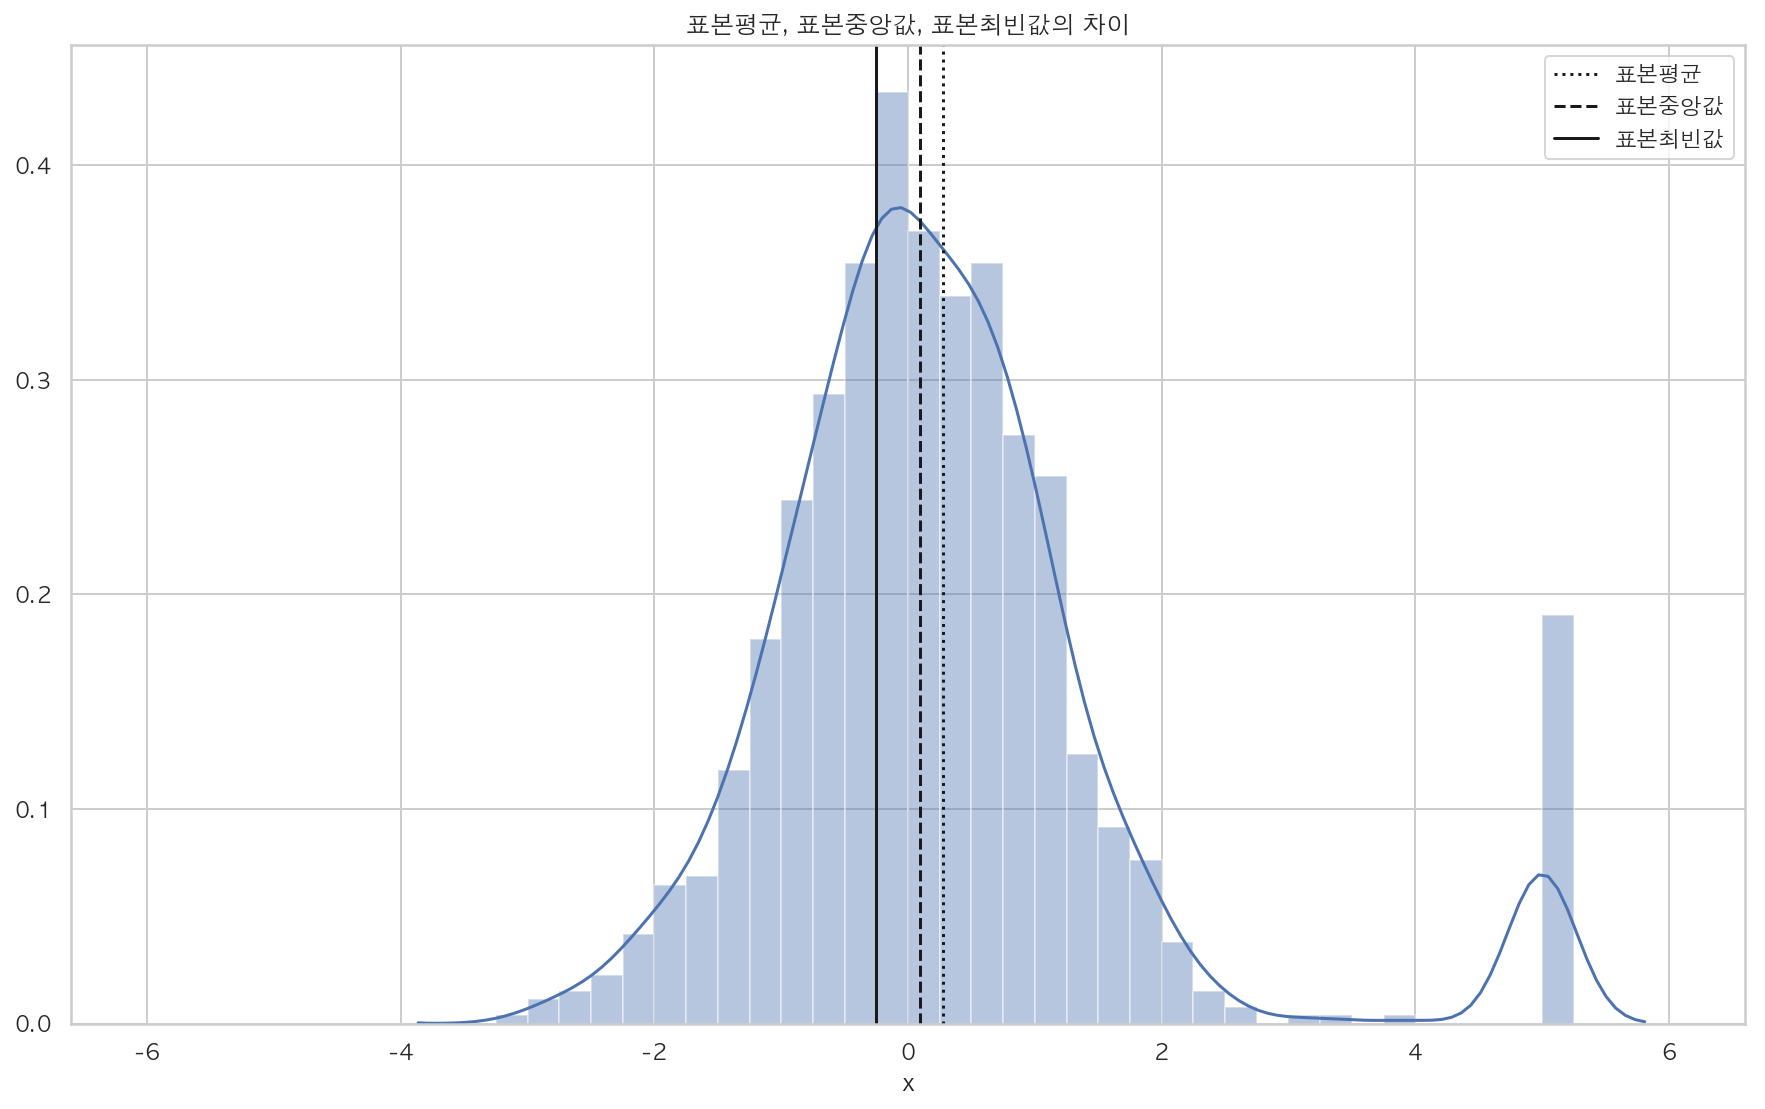

In [60]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
plt.figure(figsize=(15, 9))
sns.distplot(x, bins=bins)
plt.axvline(np.mean(x), c='k', ls=":", label="표본평균")
plt.axvline(np.median(x), c='k', ls="--", label="표본중앙값")
ns, _ = np.histogram(x, bins=bins)
plt.axvline(bins[np.argmax(ns)], c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

#### Multimodal distribution

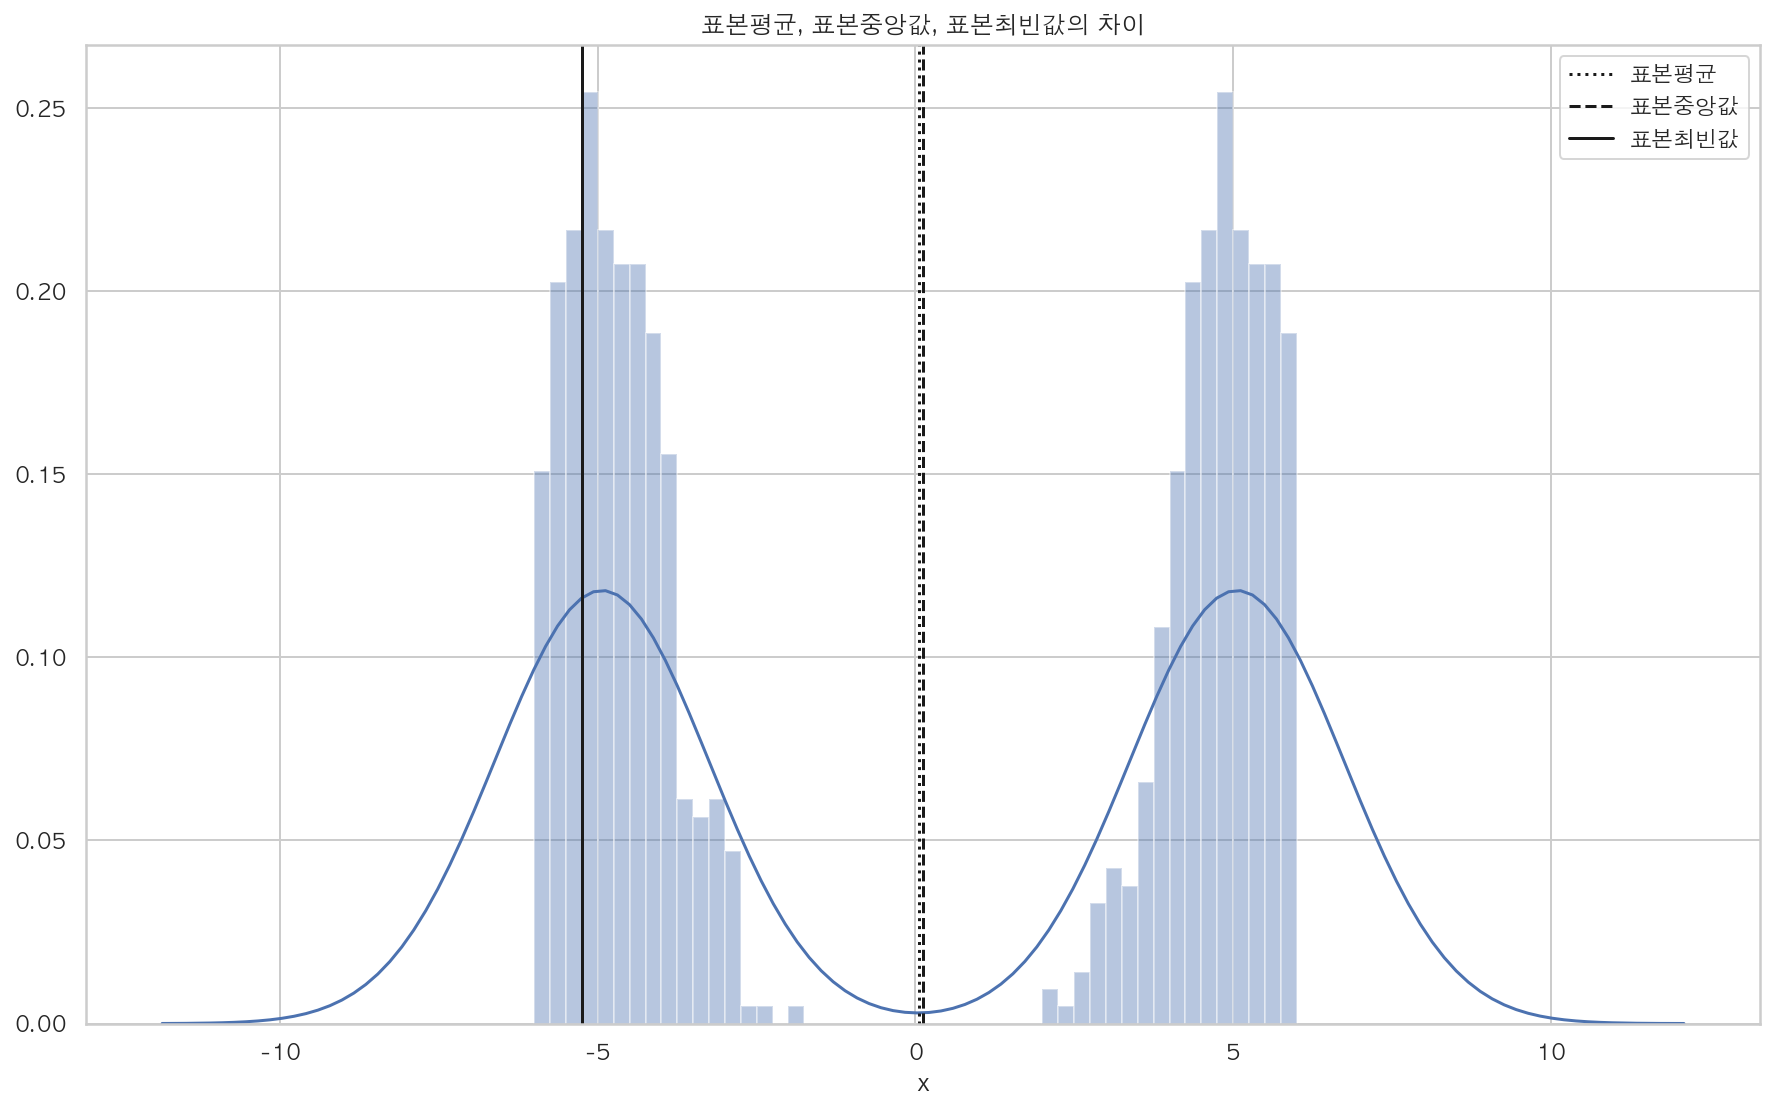

In [72]:
np.random.seed(1)
x = np.random.normal(size=500)
x = np.hstack([x - 5, x + 5])
bins = np.linspace(-6, 6, 12 * 4 + 1)
plt.figure(figsize=(15, 9))
sns.distplot(x, bins=bins)
plt.axvline(np.mean(x), c='k', ls=":", label="표본평균")
plt.axvline(np.median(x), c='k', ls="--", label="표본중앙값")
ns, _ = np.histogram(x, bins=bins)
plt.axvline(bins[np.argmax(ns)], c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

`다음처럼 분포를 그려볼 수 없을 때, 
이 분포의 특성을 나타내는 몇가지 숫자로 데이터의 분포에 대한 정보를 줄 수 있는데, 이 숫자들이 기술통계량이다. `

**(근데 우리는 21세기에 살고 있다. 그냥 그래프로...)**

### 시각화
<p id="vis">
    
 - [Python의 다양한 시각화 패키지](https://towardsdatascience.com/reviewing-python-visualization-packages-fa7fe12e622b)
 - 더 아름다운 시각화를 위해서는 
   * https://d3js.org/
   * https://www.highcharts.com/demo

#### Matplotlib와 Seaborn

* **matplotlib** : https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/
* **seaborn** : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
* **Pandas** : https://datascienceschool.net/view-notebook/372443a5d90a46429c6459bba8b4342c/

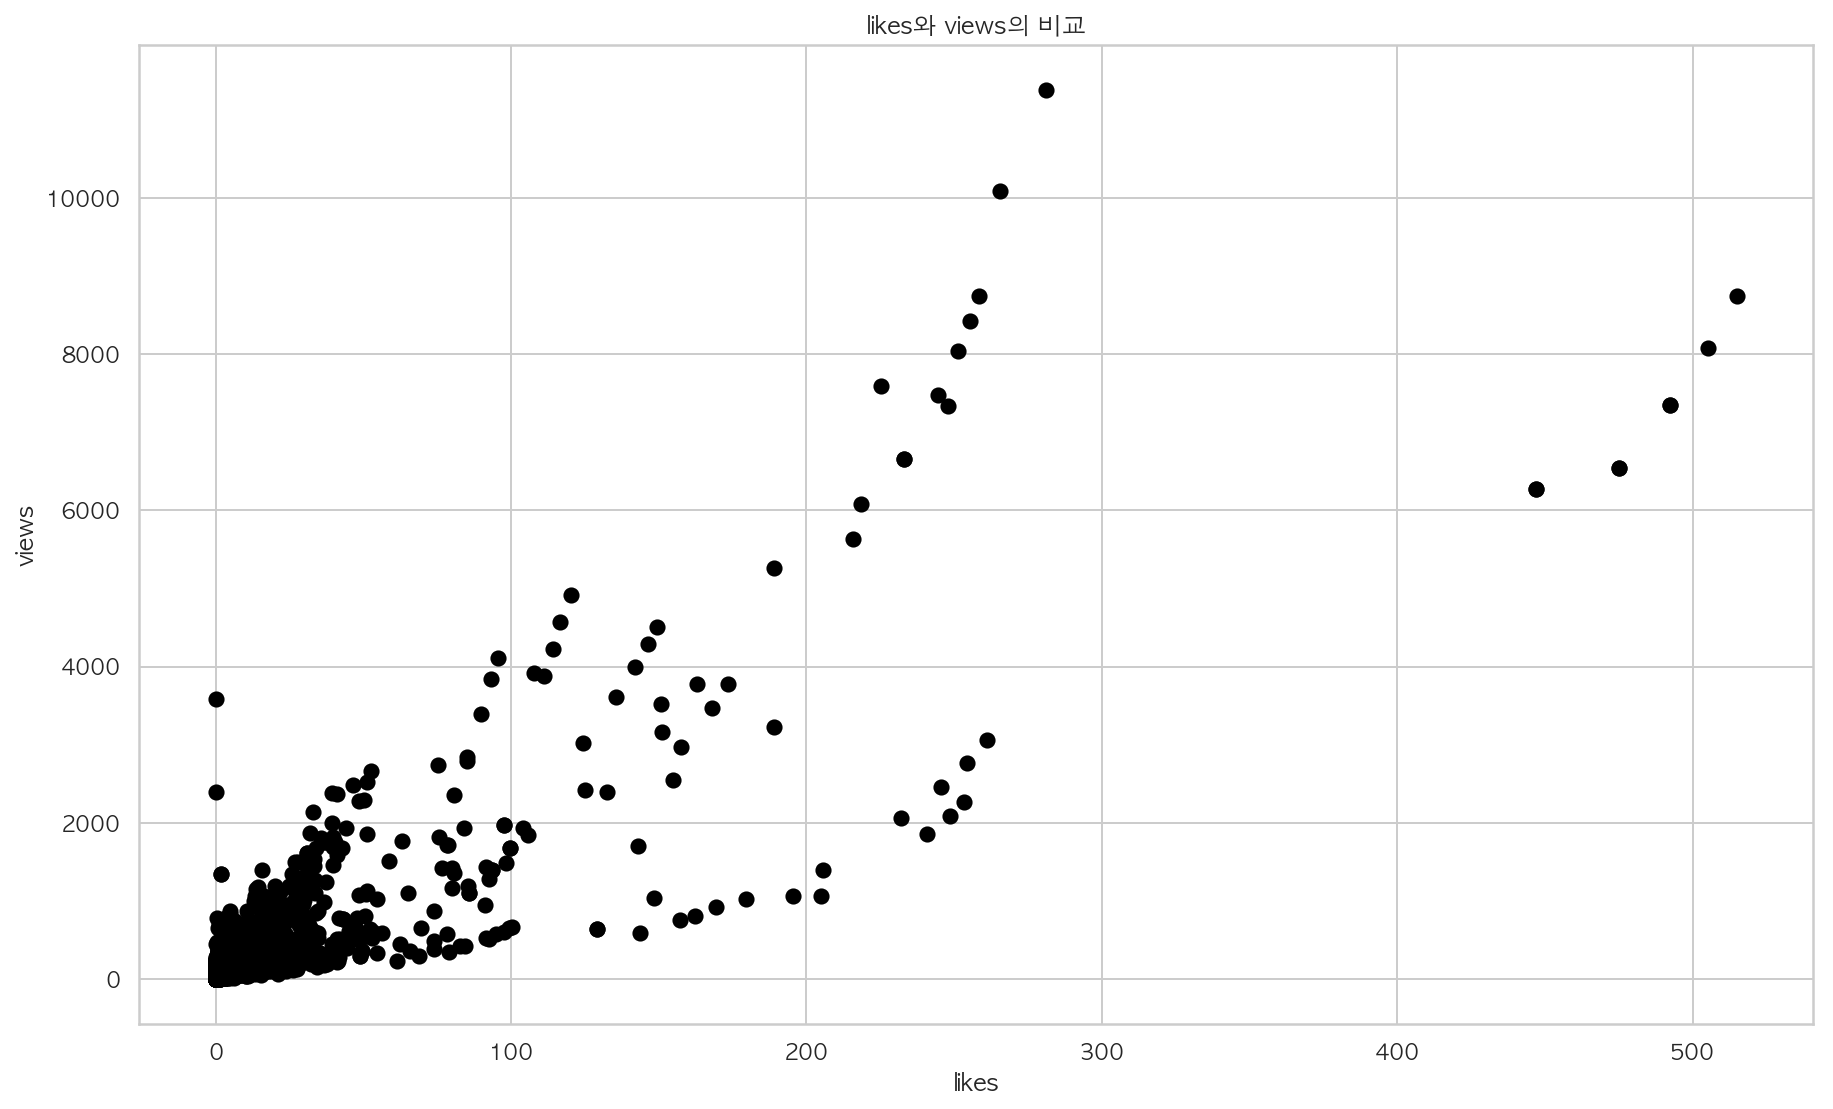

In [89]:
plt.figure(figsize=(15, 9))
plt.scatter(df.likes / 1e4, df.views / 1e4, c="black", s=50)
plt.xlabel("likes")
plt.ylabel("views")
plt.title("likes와 views의 비교")
plt.show()

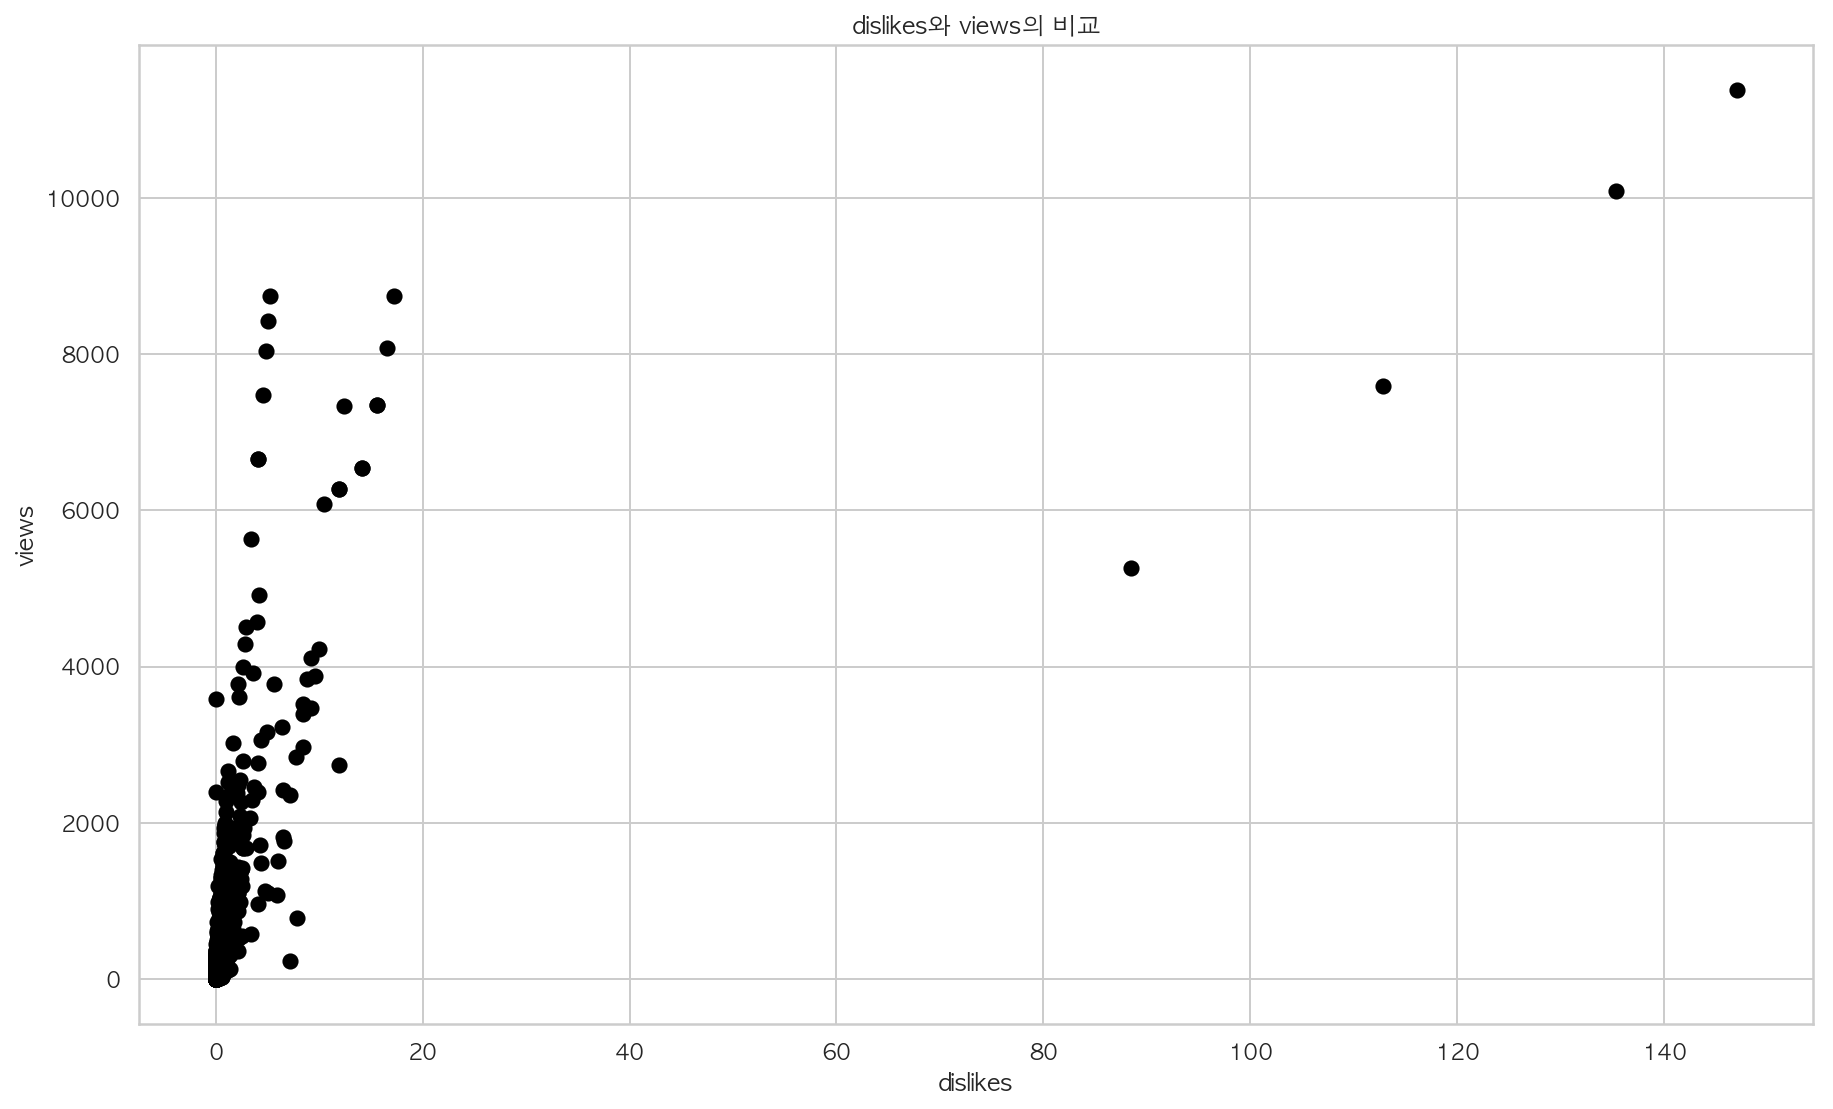

In [90]:
plt.figure(figsize=(15, 9))
plt.scatter(df.dislikes / 1e4, df.views / 1e4, c="black", s=50)
plt.xlabel("dislikes")
plt.ylabel("views")
plt.title("dislikes와 views의 비교")
plt.show()

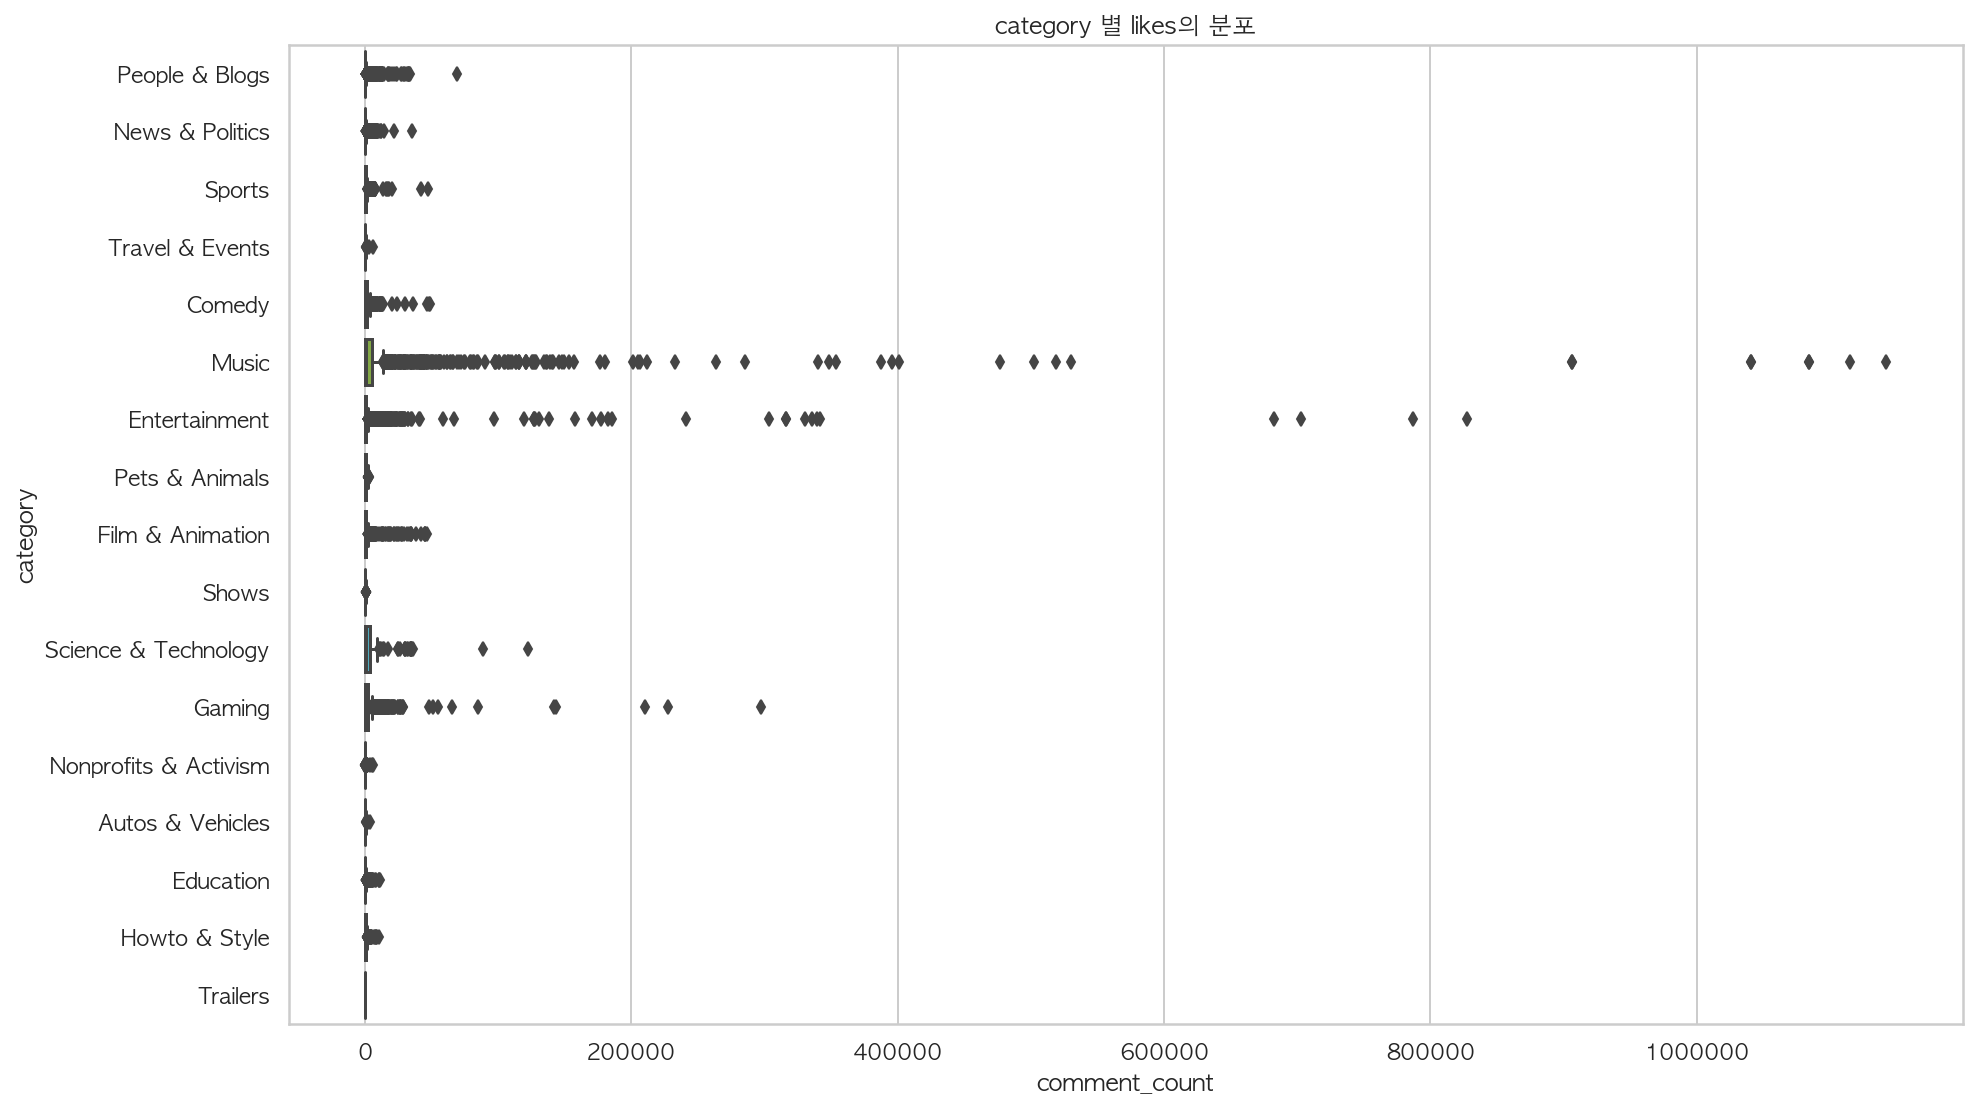

In [92]:
plt.figure(figsize=(15, 9))
sns.boxplot(x=df.comment_count, y=df.category_name)
plt.xlabel("comment_count")
plt.ylabel("category")
plt.title("category 별 likes의 분포")
plt.show()

### Data Report

<p id="report">

In [97]:
df.sort_values(by="views", ascending=False)[
    ["category_name", "title", "channel_title", "views", "likes", "dislikes"]].head(5)

,category_name,title,channel_title,views,likes,dislikes
4742,Entertainment,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217,2811223,1470388
4583,Entertainment,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567,2656686,1353663
3949,Entertainment,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245,2584675,52176
29333,Music,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865,5150839,172570
3681,Entertainment,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,84281319,2555414,51008


In [131]:
df.groupby(by="channel_title").max().sort_values(by="views", ascending=False).head(3)

,video_id,trending_date,title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category_name
channel_title,,,,,,,,,,,,,,,
YouTube Spotlight,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811223,1470388,827771,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,True,True,True,Entertainment
Marvel Entertainment,sgX_StgXGF0,18.26.01,Where Were Ant-Man and the Wasp? | New Trailer...,24,2018-05-01T14:02:27.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245,2584675,52176,341571,https://i.ytimg.com/vi/sgX_StgXGF0/default.jpg,True,True,True,Entertainment
ibighit,p8npDG2ulKQ,18.24.05,j-hope 'Daydream (백일몽)' MV,10,2018-06-01T15:00:01.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""fak...",87430865,5150839,172570,1142274,https://i.ytimg.com/vi/p8npDG2ulKQ/default.jpg,True,True,True,Music


In [130]:
df.groupby(by="channel_title").median().sort_values(by="views", ascending=False).head(3)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,,
YouTube Spotlight,24.0,88440518.0,2454261.5,1240740.0,744982.0,True,True,True
ChildishGambinoVEVO,10.0,60776509.0,2183745.0,104379.0,232723.0,True,True,True
Kylie Jenner,22.0,35832484.0,0.0,0.0,0.0,True,True,True


In [129]:
df.category_name.value_counts().index[0]

'Entertainment'

조회수 상위 10%의 카테고리 분포

In [108]:
df.quantile(0.9)["views"]

677631.5999999999

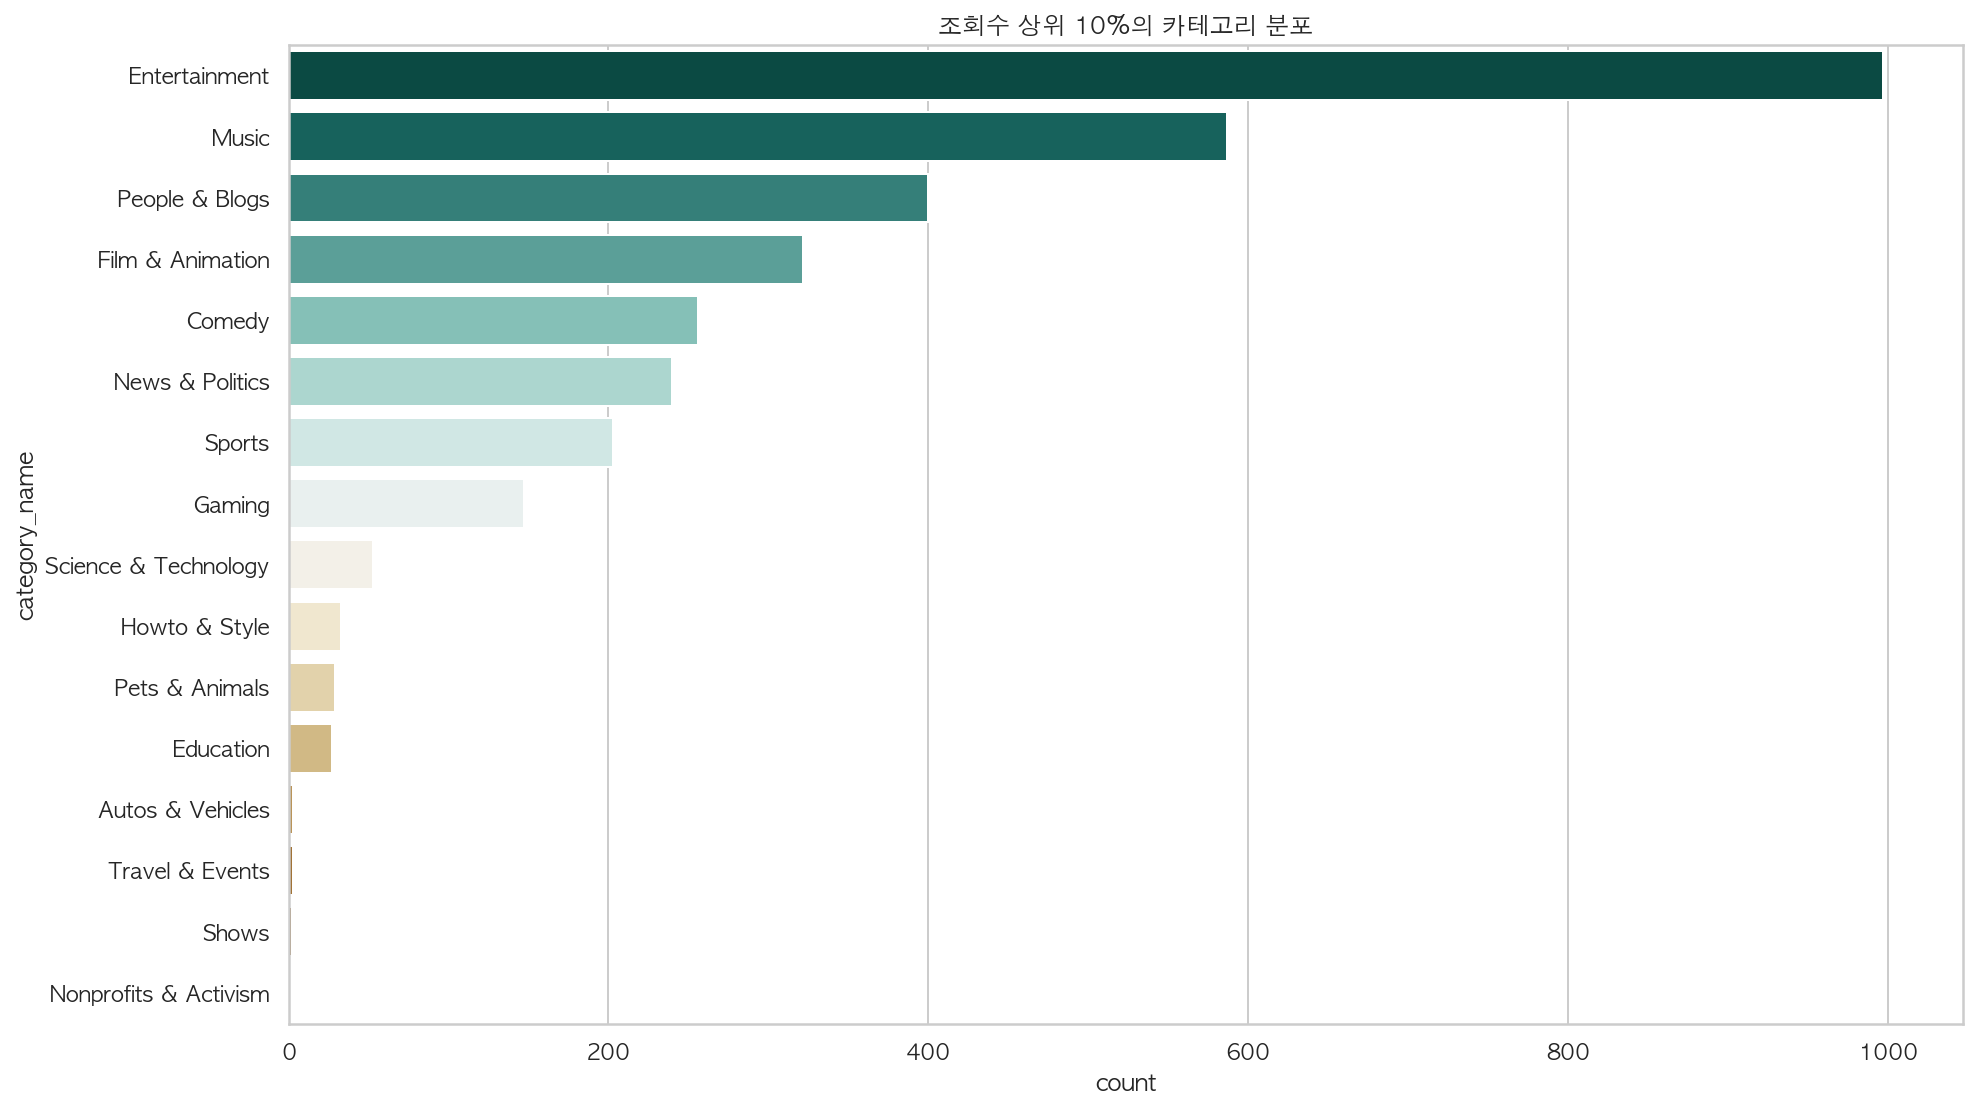

In [118]:
plt.figure(figsize=(15, 9))
top10p_viewed = df.where(df.views >= df.quantile(0.9)["views"]).sort_values(by="views", ascending=False)
sns.countplot(y=top10p_viewed.category_name,
              order=top10p_viewed.category_name.value_counts().index,
              palette="BrBG_r")
plt.title("조회수 상위 10%의 카테고리 분포")
plt.show()

`다음처럼 분포를 그려볼 수 없을 때, 
이 분포의 특성을 나타내는 몇가지 숫자로 데이터의 분포에 대한 정보를 줄 수 있는데, 이 숫자들이 기술통계량이다. `

**(근데 우리는 21세기에 살고 있다. 그냥 그래프로...)**

In [75]:
df.groupby(by="channel_title").mean().sort_values(
    by="views", ascenzding=False).head(3)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,,
YouTube Spotlight,24.0,8.584225e+07,2.402894e+06,1209208.25,750156.25,True,True,True
ChildishGambinoVEVO,10.0,4.946007e+07,1.821509e+06,84833.00,192621.00,True,True,True
Kylie Jenner,22.0,3.583248e+07,0.000000e+00,0.00,0.00,True,True,True


In [5]:
df.groupby(by="channel_title").mean().sort_values(
    by="likes", ascending=False).head(3)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,,
ibighit,10.0,28592836.00,2.593325e+06,5.085857e+04,464850.70,True,True,True
YouTube Spotlight,24.0,85842245.75,2.402894e+06,1.209208e+06,750156.25,True,True,True
ArianaGrandeVevo,10.0,32331284.00,1.890564e+06,6.405800e+04,176926.00,True,True,True


In [6]:
df.groupby(by="channel_title").mean().sort_values(
    by="comment_count", ascending=False).head(3)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,,
YouTube Spotlight,24.0,85842245.75,2.402894e+06,1.209208e+06,750156.25,True,True,True
ibighit,10.0,28592836.00,2.593325e+06,5.085857e+04,464850.70,True,True,True
Sơn Tùng M-TP Official,10.0,19135859.50,6.189715e+05,8.904700e+04,303427.50,True,True,True


In [7]:
df.groupby(by="channel_title").mean().sort_values(
    by="dislikes", ascending=False).head(3)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
channel_title,,,,,,,,
YouTube Spotlight,24.0,8.584225e+07,2.402894e+06,1209208.25,750156.25,True,True,True
Sơn Tùng M-TP Official,10.0,1.913586e+07,6.189715e+05,89047.00,303427.50,True,True,True
ChildishGambinoVEVO,10.0,4.946007e+07,1.821509e+06,84833.00,192621.00,True,True,True


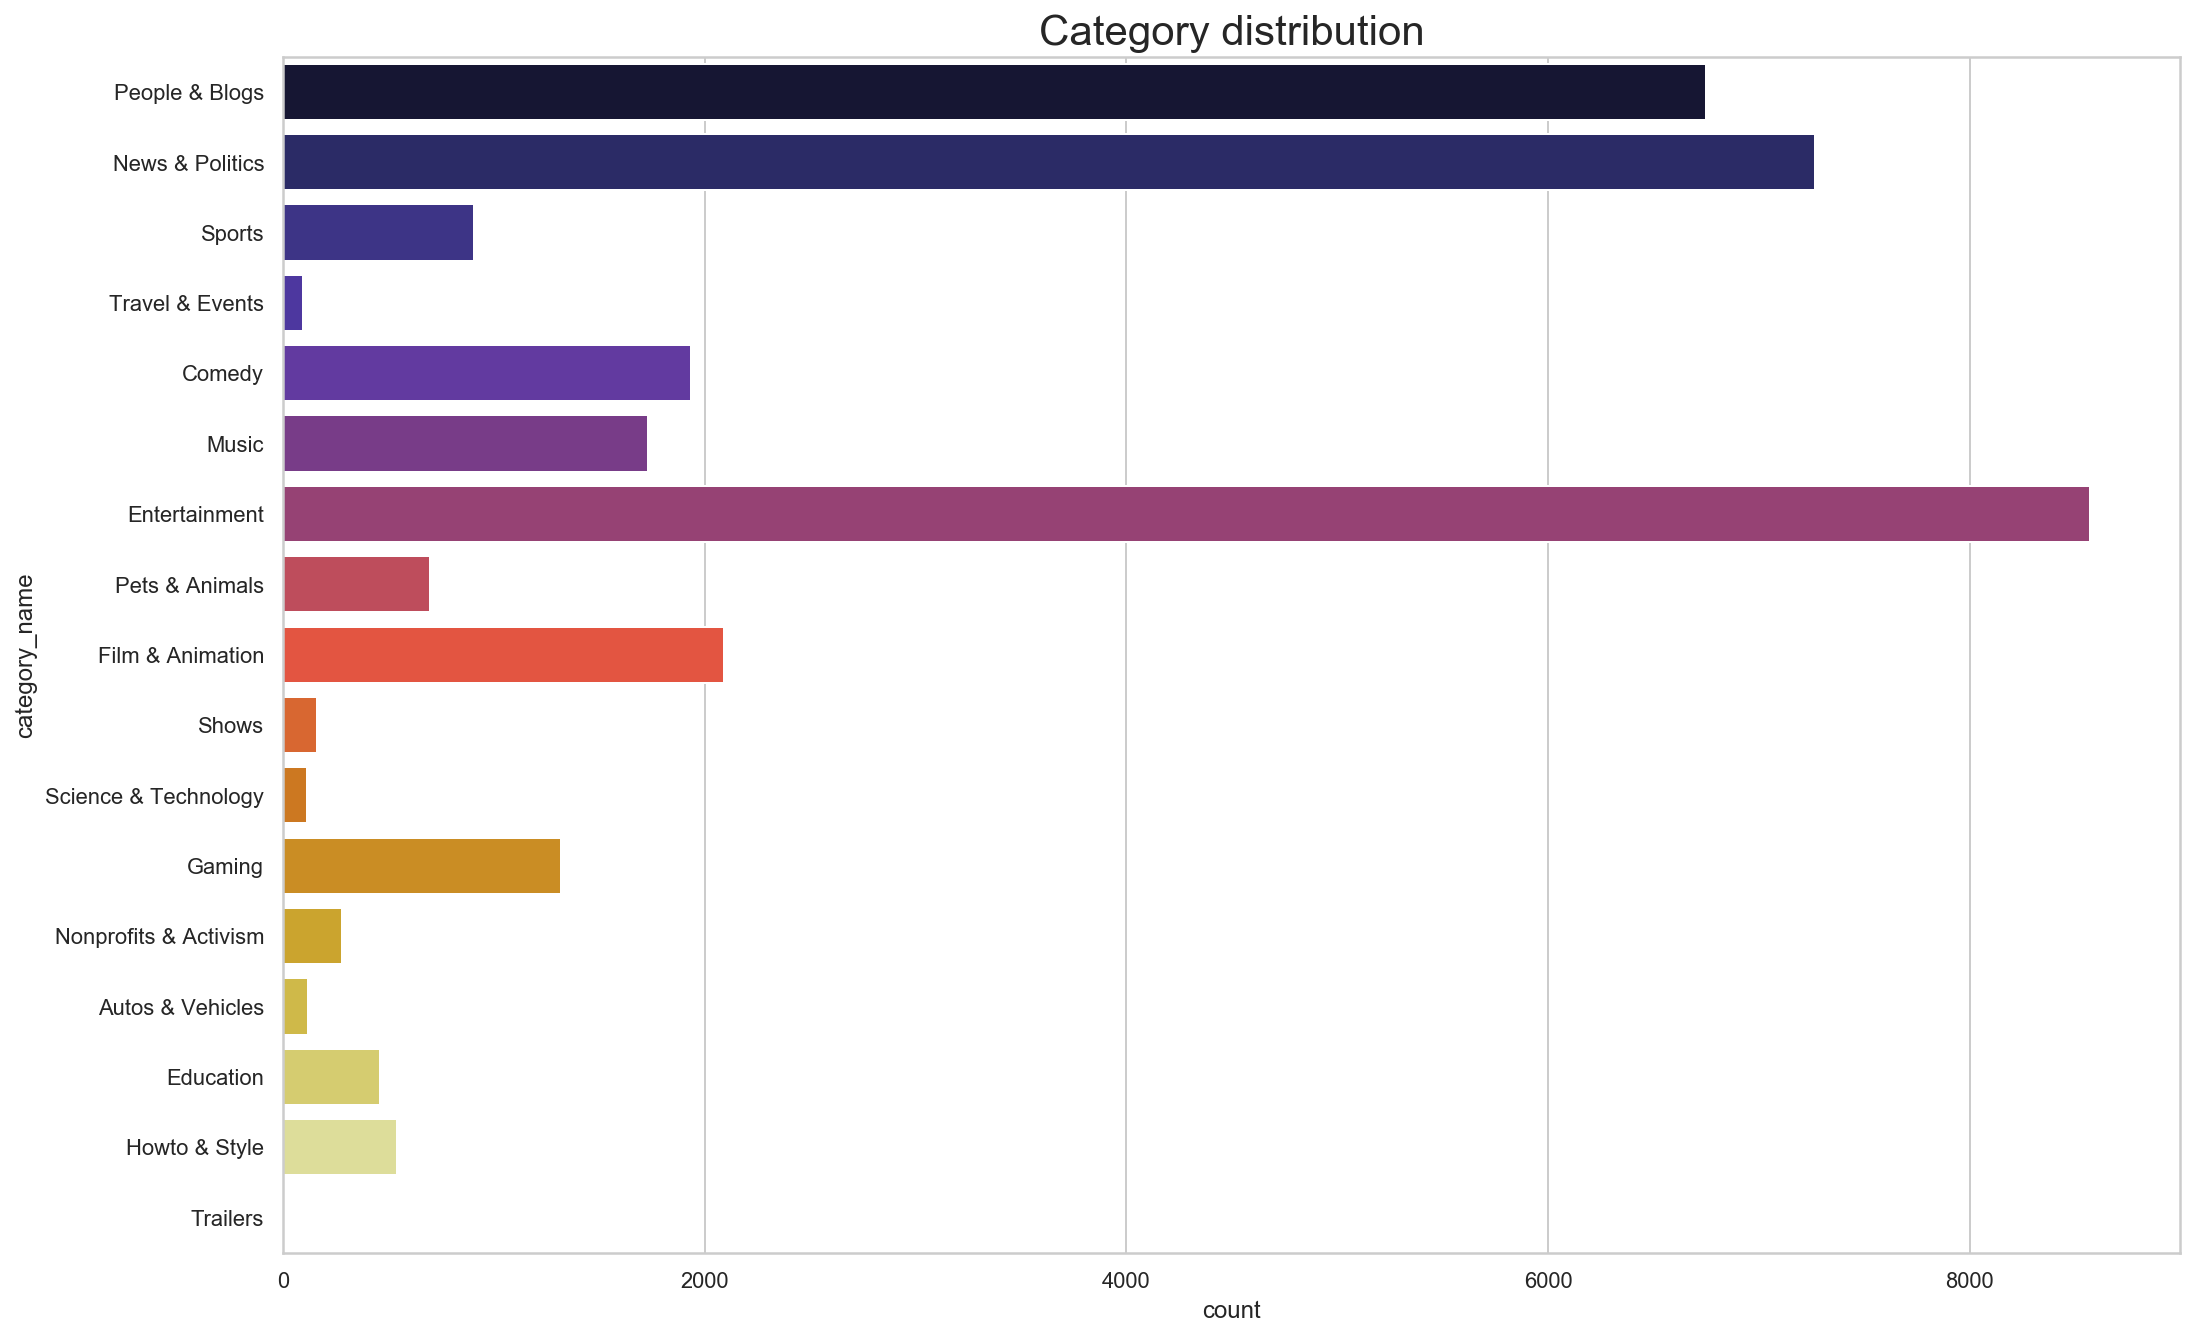

In [8]:
plt.figure(figsize=(17, 11))
sns.countplot(y=df.category_name, palette="CMRmap")
plt.title("Category distribution", fontdict={'fontsize': 21, })

plt.show()